<a href="https://colab.research.google.com/github/karloxkronfeld/covid19/blob/master/simplecovid_race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
from pylab import *
from matplotlib import animation,rc
from IPython.display import HTML

In [8]:
covid=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid=covid.drop(covid.columns[[0,2,3]],axis=1)
covid=covid.groupby(covid.columns[0]).sum().T

In [20]:
listas=[]
pasos=10
for i in range(len(covid)):
  listas.append(linspace(covid[i:i+1],covid[i+1:i+2],10))  

In [32]:
apilar_listas=[]
for x in range(len(covid)-1):
  apilar_listas.append(pd.DataFrame(columns=covid.columns))
  for i in range(pasos):
    apilar_listas[x].loc[i]=listas[x][i][0]
  apilar_listas[x]["fecha"]=covid.index[x]

In [123]:
datos=pd.concat(apilar_listas,ignore_index=True)
datos.set_index("fecha",inplace=True)
fechas=datos.index.unique()
# traspuesta=datos.T
# traspuesta["TOTAL"]=datos.iloc[1649]
# datos=traspuesta.sort_values("TOTAL").T

In [148]:
def race_mundial(numero):
  funcion=datos.iloc[numero].sort_values()[-10:]
  pais=funcion.index
  casos=funcion.values
  ax.clear()
  ax.barh(pais,casos)

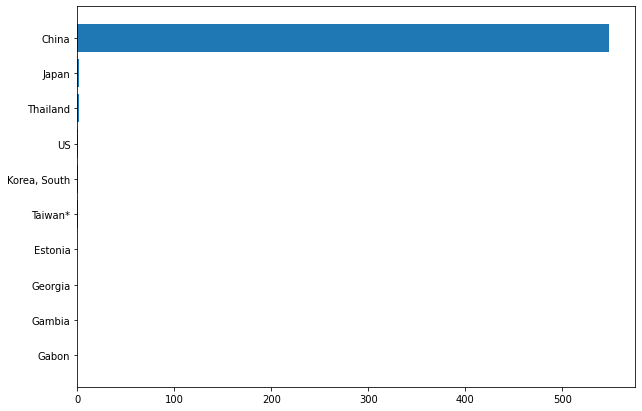

In [153]:
fig_race,ax=subplots(figsize=(10,7))
# race_mundial(1000)
frames=range(len(datos))
mi_anim=animation.FuncAnimation(fig_race,race_mundial,frames,interval=40)
rc("animation",ffmpeg_path="/usr/bin/ffmpeg")
HTML(mi_anim.to_html5_video())